In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [77]:
df = pd.read_csv("diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [78]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [79]:
len(df)

101766

In [80]:
df.groupby("readmitted").size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [81]:
df=df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]
# removing the ids that are related to death/hospice/expired from the discharge disposition ids.
# refer ID_Mappings.csv fro id referals

In [82]:
# predicting if a patient is likely to be re-admitted within 30 days of discharge or not
# creating an output variable for binary classification

df["OUTPUT_LABEL"]= (df.readmitted == '<30').astype('int')

In [83]:
# A function to calculate the prevalence of population that is readmitted with 30 days.
# Prevalence is the proportion of the population that is outcome-positive at a given point in time
def calc_prevalence(y_actual):
    return (sum (y_actual)/len(y_actual))


In [84]:
print('Prevalence :%.3f'%calc_prevalence(df['OUTPUT_LABEL'].values*100))

Prevalence :11.389


In [85]:
#Around 11% of the population is readmitted. But this data creates an imbalanced classification problem. 
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,OUTPUT_LABEL
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [86]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

## Cleaning Data:
    > encounter_id and patient_nbr are identifiers ( NO USE)
    > age and weight are categorical
    > admission_type_id, discharge_dispoition_id,admission_source_id are numerical :
        > But refered to ID_mappings.csv we can take it for categorical data.
    > examide & citoglipton have only 1 value (NO USE)
    > diag1,diag2,diag are categorical. we will group these to reduce dimension.
    > medical_speciality - categorical, can be used to make features.

## Feature Engineering

In [87]:
df= df.replace('?',np.nan)
# Replacing ? with nan

In [88]:
# Numerical features - Making it into a separate dataset
colus_num = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient',
            'number_emergency','number_inpatient','number_diagnoses']

In [89]:
# checking missing values in the numerical data
df[colus_num].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [90]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

### We can see that there are no null values in the numerical data 

In [91]:
# Dealing with categorical values
# Using one hot encoding to convert them to numerical values

cols_cat = ['race','gender','max_glu_serum','A1Cresult','metformin','repaglinide','chlorpropamide','glimepiride',
            'acetohexamide','glipizide','glyburide', 'tolbutamide','pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol' ,'troglitazone', 'tolazamide'
           ,'examide' ,'citoglipton' ,'insulin', 'payer_code' ,'glyburide-metformin', 'glipizide-metformin' ,'glimepiride-pioglitazone' 
           ,'metformin-rosiglitazone', 'metformin-pioglitazone' ,'change' ,'diabetesMed'  ]

In [92]:
df[cols_cat].isnull().sum()

race                         2234
gender                          0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
examide                         0
citoglipton                     0
insulin                         0
payer_code                  39398
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
dtype: int64

In [93]:
df['medical_specialty'].isnull().sum()

48616

### We can see that the columns "race","payer_code","medical_speciality" have a lot of missing values

### Adding another categorical type for unknown using the `fillna` function. 

In [94]:
df['race']=df['race'].fillna('UNK')
df['payer_code']=df['payer_code'].fillna('UNK')
df['medical_specialty']=df['medical_specialty'].fillna('UNK')

In [95]:
# Inspecting the medical specialty column

print('Number of medical specialty',df.medical_specialty.nunique())

Number of medical specialty 73


In [96]:
df1= df.groupby('medical_specialty').size().sort_values(ascending=False)
df1.head(20)

medical_specialty
UNK                                  48616
InternalMedicine                     14237
Emergency/Trauma                      7419
Family/GeneralPractice                7252
Cardiology                            5279
Surgery-General                       3059
Nephrology                            1539
Orthopedics                           1392
Orthopedics-Reconstructive            1230
Radiologist                           1121
Pulmonology                            854
Psychiatry                             853
Urology                                682
ObstetricsandGynecology                669
Surgery-Cardiovascular/Thoracic        642
Gastroenterology                       538
Surgery-Vascular                       525
Surgery-Neuro                          462
PhysicalMedicineandRehabilitation      391
Oncology                               319
dtype: int64

In [97]:
# Instead of adding 73 variables into the column ,
# Creating a new variable that only has 11 options (the top 10 specialities and then an other category) 
# Bucketing

top_10=["UNK",'InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General','Nephrology',
       'Orthopedics','Orthopedics-Reconstructive','Radiologist']

# making a new column with the duplicated data
df['med_spec']= df['medical_specialty'].copy()


In [98]:
# Replacing all specialities not in the top ten with the other category

df.loc[~df.med_spec.isin(top_10),'med_spec']="Other"

In [99]:
df.groupby('med_spec').size()

med_spec
Cardiology                     5279
Emergency/Trauma               7419
Family/GeneralPractice         7252
InternalMedicine              14237
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Other                          8199
Radiologist                    1121
Surgery-General                3059
UNK                           48616
dtype: int64

## One-Hot Encoding

In [100]:
# Use getdummies for one hot encoding

# Droping the first categorical value of each column

# Converting the numerical data from the 3 ID types into strings

cols_cat_num = ["admission_type_id","discharge_disposition_id","admission_source_id"]
df[cols_cat_num] = df[cols_cat_num].astype('str')

In [101]:
df_cat = pd.get_dummies(df[cols_cat + cols_cat_num +['med_spec']],drop_first=True )

In [102]:
df_cat.head()
# One-Hot Encoding done

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Using concat function to  add the one-hot encoding columns to the dataframe

In [103]:
df=pd.concat([df,df_cat],axis=1)

In [104]:
# Saving the column names of the categorical data for later

cols_all_cat = list(df_cat.columns)

## Extra Features

In [105]:
# Dealing with columns "age" and "weight"

df[["age","weight"]].head()

,age,weight
0,[0-10),NaN
1,[10-20),NaN
2,[20-30),NaN
3,[30-40),NaN
4,[40-50),NaN


### Since there is a natural order to these values,
###    it might make more sense to convert these to numerical data that is ordered.

### Age

In [106]:
df.groupby("age").size()

age
[0-10)        160
[10-20)       690
[20-30)      1649
[30-40)      3764
[40-50)      9607
[50-60)     17060
[60-70)     22059
[70-80)     25331
[80-90)     16434
[90-100)     2589
dtype: int64

### Mapping these to 0 to 90 by 10s for the numerical data.

In [107]:
age_id = {'[0-10)':0,        
'[10-20)':10,
'[20-30)':20,     
'[30-40)':30,      
'[40-50)':40,     
'[50-60)':50,   
'[60-70)':60,  
'[70-80)':70, 
'[80-90)':80,
'[90-100)':90}

df['age_group']= df.age.replace(age_id)

### Weight

In [108]:
df.weight.notnull().sum()

3125

#### Instead of creating an ordinal feature that we did above, let’s just create a variable to say if weight was filled out or not. 
#### The presence of a variable might be predictive regardless of the value.

In [109]:
df['has_weight']=df.weight.notnull().astype('int')

In [110]:
# Saving the column names of the categorical data for later

cols_extra = ['age_group','has_weight']

### Feature Engineering: Summary
##### Through this process we created 143 features for the machine learning model. The break-down of the features is

##### 8 numerical features
##### 133 categorical features
##### 2 extra features


In [111]:
# Creating a dataset that has only the features and the output labels

col2use = colus_num + cols_all_cat + cols_extra
df_data = df[col2use + ["OUTPUT_LABEL"]]

## Building Training/Validation/Test Samples

### Splitting the dat ainto 3 parts :
### Training Data 
##### -Used to train the model
### Testing Data 
##### -Used to measure the generalized performance of the model
### Validation Data
##### -Taken from the training data, Used to make decisons on how to improve the model


### 70% train, 15% validation, and 15% test.

#### Shuffling the samples using "sample" in case there was is order (eg.all positive samples on top).
#### Here n is the number of samples. random_state is just specified so the project is reproducable. 


In [112]:
df_data = df_data.sample(n=len(df_data),random_state=42)
df_data = df_data.reset_index(drop=True)

### We can use sample again to extract 30% (using frac) of the data to be used for validation / test splits. 
### It is important that validation and test come from similar distributions.

In [113]:
df_valid_test = df_data.sample(frac=0.30,random_state=42)
print('Split size : %.3f'%(len(df_valid_test)/len(df_data)))

Split size : 0.300


### And now split into test and validation using 50% fraction

In [114]:
df_test = df_valid_test.sample(frac=0.5, random_state=42)
df_valid = df_valid_test.drop(df_test.index)

In [115]:
# Using the rest of the data as training data

df_train_all = df_data.drop(df_valid_test.index)

In [116]:
print('Test Prevalence :%.3f'%calc_prevalence(df_test['OUTPUT_LABEL'].values))

Test Prevalence :0.117


In [117]:
print('Valid Prevalence :%.3f'%calc_prevalence(df_valid['OUTPUT_LABEL'].values))

Valid Prevalence :0.113


In [118]:
print('Train Prevalence :%.3f'%calc_prevalence(df_train_all['OUTPUT_LABEL'].values))

Train Prevalence :0.113


### Here we can see that the Prevalence is about the same for each group 

### At this point, you might say, drop the training data into a predictive model and see the outcome. However, if we do this, it is possible that we will get back a model that is 89% accurate. Great! Good job! But we never catch any of the readmissions (recall= 0%). 

### We have an imbalanced dataset where there are much more negatives than positives, so the model might just assign all samples as negative.

### Typically, it is better to balance the data in some way to give the positives more weight. There are 3 strategies that are typically utilized

##### 1. sub-sample the more dominant class: use a random subset of the negatives
##### 2. over-sample the imbalanced class: use the same positive samples multiple times
##### 3. create synthetic positive data

## Sub-Sample Approach
### Creating a balanced training data set that has 50% positive and 50% negative

In [119]:
# Splitting the data into negative and positive

rows_pos = df_train_all.OUTPUT_LABEL ==1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

In [120]:
# Merging the balanced data

df_train = pd.concat([df_train_pos,df_train_neg.sample(n=len(df_train_pos),random_state=42)],axis = 0)

In [121]:
# Shuffling the order of training samples

df_train = df_train.sample(n=len(df_train),random_state =42).reset_index(drop=True)

In [122]:
print("Train balanced Prevalence (n=%d):%.3f " %(len(df_train),calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced Prevalence (n=15766):0.500 


In [123]:
# Most machine learning packages like to use an input matrix X and output vector y

# Collecting values from the respective datasets in the form of a view that contains the values of the dictionary as a list.

X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print("Training All Shapes",X_train_all.shape)
print("Training shapes",X_train.shape,y_train.shape)
print("Validation Shapes",X_valid.shape,y_valid.shape)

Training All Shapes (69540, 140)
Training shapes (15766, 140) (15766,)
Validation Shapes (14901, 140) (14901,)


In [124]:
# Scaling the data so that the train and the test data is of the same scale
# Using Scikit-learn's Standard Scaler- Removes the mean and scales to unit variance.
# Creating a a scaler using the training data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_all)


StandardScaler()

In [125]:
# Saving the scaler property using pickle

import pickle
scalerfile='scaler.sav'
pickle.dump(scaler,open(scalerfile,'wb'))

In [126]:
# Loading it back

scaler = pickle.load(open(scalerfile,'rb'))

In [127]:
# Transforming the data matrices

X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

## Model Selection

In [128]:
# Selecting the best model based on performacne on the validation set.

In [129]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual,y_pred,thresh):
    #calculating the specificity
    return sum((y_pred < thresh) & (y_actual==0))/sum(y_actual==0)

def print_report (y_actual,y_pred,thresh):
    auc = roc_auc_score(y_actual,y_pred)
    accuracy = accuracy_score(y_actual,(y_pred>thresh))
    recall = recall_score(y_actual,(y_pred>thresh))
    precision = precision_score(y_actual,(y_pred>thresh))
    specificity = calc_specificity(y_actual, y_pred,thresh)
    print('AUC : %.3f'%auc)
    print('Accuracy : %.3f'%accuracy)
    print('Recall : %.3f'%recall)
    print('Precision :%.3f'%precision)
    print('Specificity :%.3f'%specificity)
    print('Prevalence :%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc,accuracy,recall,precision, specificity
    

    
    

In [130]:
# Since we balanced our training data, 
# let’s set our threshold at 0.5 to label a predicted sample as positive.
thresh = 0.5

## Model Selection

### Comparing the performance of the following 7 machine learning models using default hyperparameters:

### 1. K-nearest neighbors
### 2. Logistic regression
### 3. Stochastic gradient descent
### 4. Naive Bayes
### 5. Decision tree
### 6. Random forest
### 7. Gradient boosting classifier

## K-nearest neighbors

In [131]:


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors=100)
knn.fit(X_train_tf,y_train)

KNeighborsClassifier(n_neighbors=100)

In [132]:
# Evaluating the performance :

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training : ')
knn_train_auc, knn_train_accuracy,knn_train_recall,knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)

print("Validation : ")
knn_valid_auc, knn_valid_accuracy,knn_valid_recall,knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)



KNN
Training : 
AUC : 0.650
Accuracy : 0.603
Recall : 0.487
Precision :0.635
Specificity :0.679
Prevalence :0.500
 
Validation : 
AUC : 0.622
Accuracy : 0.673
Recall : 0.462
Precision :0.164
Specificity :0.661
Prevalence :0.113
 


## Logistic Regression

In [133]:


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_tf,y_train)


LogisticRegression(random_state=42)

In [134]:
#Evaluating the performance of the model


y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training : ')
lr_train_auc, lr_train_accuracy,lr_train_recall,lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)

print("Validation : ")
lr_valid_auc, lr_valid_accuracy,lr_valid_recall,lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)



Logistic Regression
Training : 
AUC : 0.678
Accuracy : 0.628
Recall : 0.558
Precision :0.649
Specificity :0.699
Prevalence :0.500
 
Validation : 
AUC : 0.661
Accuracy : 0.663
Recall : 0.557
Precision :0.180
Specificity :0.676
Prevalence :0.113
 


## Stochastic Gradient Descent

In [135]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss='log',alpha= 0.1,random_state=42)
sgdc.fit(X_train_tf,y_train)



SGDClassifier(alpha=0.1, loss='log', random_state=42)

In [136]:
#Evaluating the performance of the model


y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descent')
print('Training : ')
sgdc_train_auc, sgdc_train_accuracy,sgdc_train_recall,sgdc_train_precision, sgdc_train_specificity = print_report(y_train,y_train_preds, thresh)

print("Validation : ")
sgdc_valid_auc, sgdc_valid_accuracy,sgdc_valid_recall,sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)



Stochastic Gradient Descent
Training : 
AUC : 0.675
Accuracy : 0.624
Recall : 0.550
Precision :0.645
Specificity :0.698
Prevalence :0.500
 
Validation : 
AUC : 0.661
Accuracy : 0.664
Recall : 0.553
Precision :0.180
Specificity :0.678
Prevalence :0.113
 


## Naive Bayes

In [137]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf,y_train)


GaussianNB()

In [138]:
#Evaluating the performance of the model


y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training : ')
nb_train_auc, nb_train_accuracy,nb_train_recall,nb_train_precision, nb_train_specificity = print_report(y_train,y_train_preds, thresh)

print("Validation : ")
nb_valid_auc, nb_valid_accuracy,nb_valid_recall,nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)



Naive Bayes
Training : 
AUC : 0.508
Accuracy : 0.506
Recall : 0.989
Precision :0.503
Specificity :0.022
Prevalence :0.500
 
Validation : 
AUC : 0.506
Accuracy : 0.129
Recall : 0.988
Precision :0.114
Specificity :0.019
Prevalence :0.113
 


## Decision Tree Classifier


In [139]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10,random_state=42)

tree.fit(X_train_tf,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [140]:
#Evaluating the performance of the model


y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree Classifier')
print('Training : ')
tree_train_auc, tree_train_accuracy,tree_train_recall,tree_train_precision, tree_train_specificity = print_report(y_train,y_train_preds, thresh)

print("Validation : ")
tree_valid_auc, tree_valid_accuracy,tree_valid_recall,tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)



Decision Tree Classifier
Training : 
AUC : 0.736
Accuracy : 0.672
Recall : 0.629
Precision :0.688
Specificity :0.713
Prevalence :0.500
 
Validation : 
AUC : 0.623
Accuracy : 0.635
Recall : 0.570
Precision :0.169
Specificity :0.642
Prevalence :0.113
 


## Random Forest 

In [141]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=6,random_state=42)
rf.fit(X_train_tf,y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [142]:
#Evaluating the performance of the model


y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training : ')
rf_train_auc, rf_train_accuracy,rf_train_recall,rf_train_precision, rf_train_specificity = print_report(y_train,y_train_preds, thresh)

print("Validation : ")
rf_valid_auc, rf_valid_accuracy,rf_valid_recall,rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)



Random Forest
Training : 
AUC : 0.696
Accuracy : 0.642
Recall : 0.627
Precision :0.647
Specificity :0.658
Prevalence :0.500
 
Validation : 
AUC : 0.655
Accuracy : 0.616
Recall : 0.610
Precision :0.169
Specificity :0.617
Prevalence :0.113
 


## Gradient Boosting Classifier

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [144]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC : 0.771
Accuracy : 0.698
Recall : 0.674
Precision :0.708
Specificity :0.723
Prevalence :0.500
 
Validation:
AUC : 0.636
Accuracy : 0.611
Recall : 0.573
Precision :0.160
Specificity :0.616
Prevalence :0.113
 


In [145]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_valid_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_valid_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_valid_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_valid_auc,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_valid_specificity,gbc_valid_specificity,]})


In [146]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(style='darkgrid')

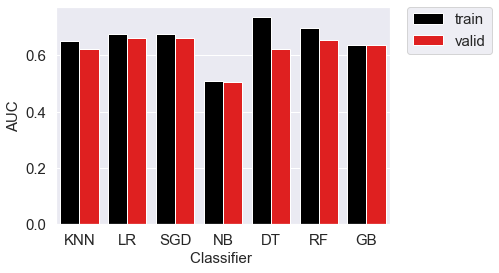

In [147]:
color=['black','red']
ax = sns.barplot(x='classifier',y='auc',hue='data_set',data=df_results,palette=color)
ax.set_xlabel ('Classifier ',fontsize= 15)
ax.set_ylabel ('AUC',fontsize=15)
ax.tick_params(labelsize=15)

plt.legend(bbox_to_anchor=(1.05,1),loc = 2, borderaxespad=0.,fontsize=15)
plt.show()



### As we can see most of the models (except Naive Bayes) have similar performance on the validation set. There is some overfitting as noted by the drop between training and validation. Let’s see if we can improve this performance using a few more techniques.

## Model Selection: Learning Curve


In [148]:
# learning curve is used to diagnose how the models are doing with sklearn

In [149]:
# PLotting AUC Curve

import numpy as np
from sklearn.model_selection import learning_curve #Determines cross-validated training and test scores for different training set sizes.
from sklearn.model_selection import ShuffleSplit # Random permutation cross-validator

def plot_learning_curve(estimator, title, X,y,ylim=None,cv=None,
                       n_jobs = 1,train_sizes=np.linspace(.1,1.0,5)):

# Estimator = The object that implements the "fit" and "predict" part of the learning curve which is cloned for each validation
# X = array-like  Training vector with number of features and number of samples
# y = optional Target relative to X for classification/regression 
# ylim = tuple , (ymin,ymax), it defines the minimum and maximum yvalues plotted
# cv = cross validation generator, determines the cross validation splitting stratergy
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("AUC")
    train_sizes,train_scores, test_scores = learning_curve(
        estimator, X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes,scoring='roc_auc')
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores, axis= 1)
    test_scores_std = np.std(test_scores,axis = 1)
    plt.grid()

    plt.fill_between(train_sizes,train_scores_mean- train_scores_std,
                train_scores_mean + train_scores_std,alpha = 0.1, color='r')

    plt.fill_between(train_sizes,test_scores_mean- test_scores_std,
                test_scores_mean + test_scores_std,alpha = 0.1, color='b')

    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label ="Training Score")
    plt.plot(train_sizes,test_scores_mean,'o-',color='g',label ="CROSS-VALIDATION SCORE")

    plt.legend(loc='best')
    return plt


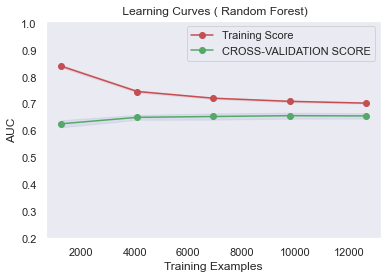

In [150]:
title = " Learning Curves ( Random Forest)"
#  Performing Cross validation with 5 iterations to get smoother mean test and train

# scoring curves . each time with 20% data randomly selected as a validation test

cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=100)
estimator = RandomForestClassifier(max_depth=6,random_state=100)

plot_learning_curve(estimator,title,X_train_tf,y_train,ylim=(0.2,1.01),cv=cv,n_jobs=4)
plt.show()


### In the case of random forest, we can see the training and validation scores are similar but they both have low scores. 
### This is called high bias and is a sign of underfitting.
### Depending on your learning curve, there are a few strategies you can employ to improve your models

#### High Bias:

##### Add new features
##### Increase model complexity
##### Reduce regularization
##### Change model architecture
#### High Variance:

##### Add more samples
##### Add regularization
##### Reduce number of features
##### Decrease model complexity
##### Add better features
##### Change model architecture

## Feature Importance - Logistic Regression

In [151]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [152]:
feature_importances.head()

,importance
number_inpatient,0.357617
rosiglitazone_No,0.282592
rosiglitazone_Steady,0.237086
discharge_disposition_id_22,0.202479
repaglinide_No,0.168538


### For logistic regression, the variables with highest positive coefficients are predictive of re-hospitalization and the variables with highest negative coefficients are predictive of not being re-hospitalized. We can plot the top 50 for each direction below.

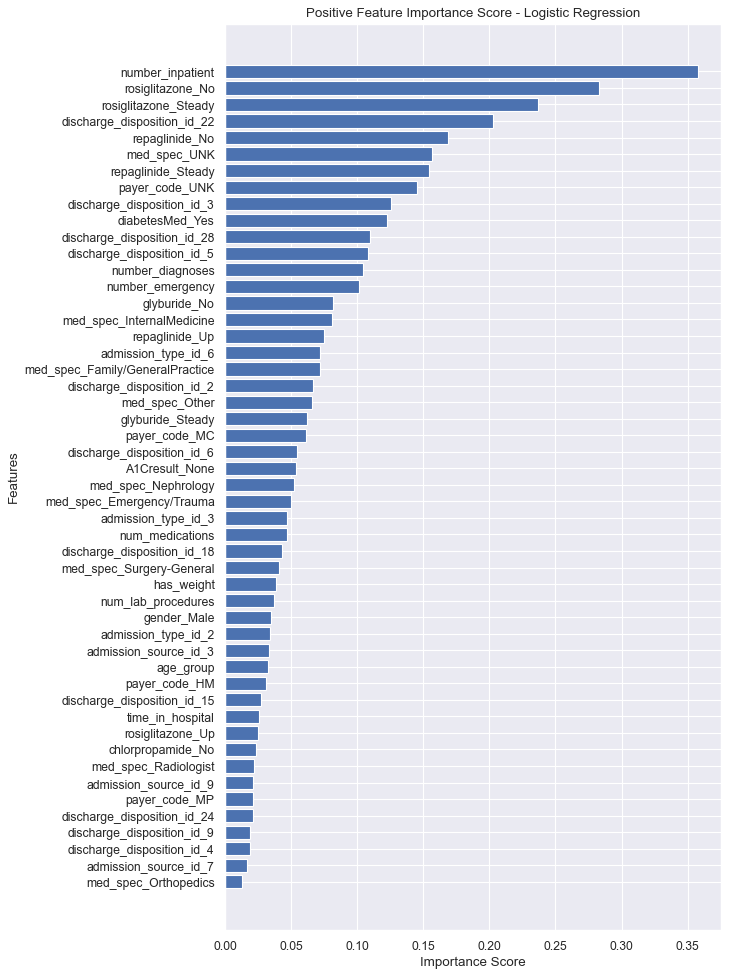

In [153]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

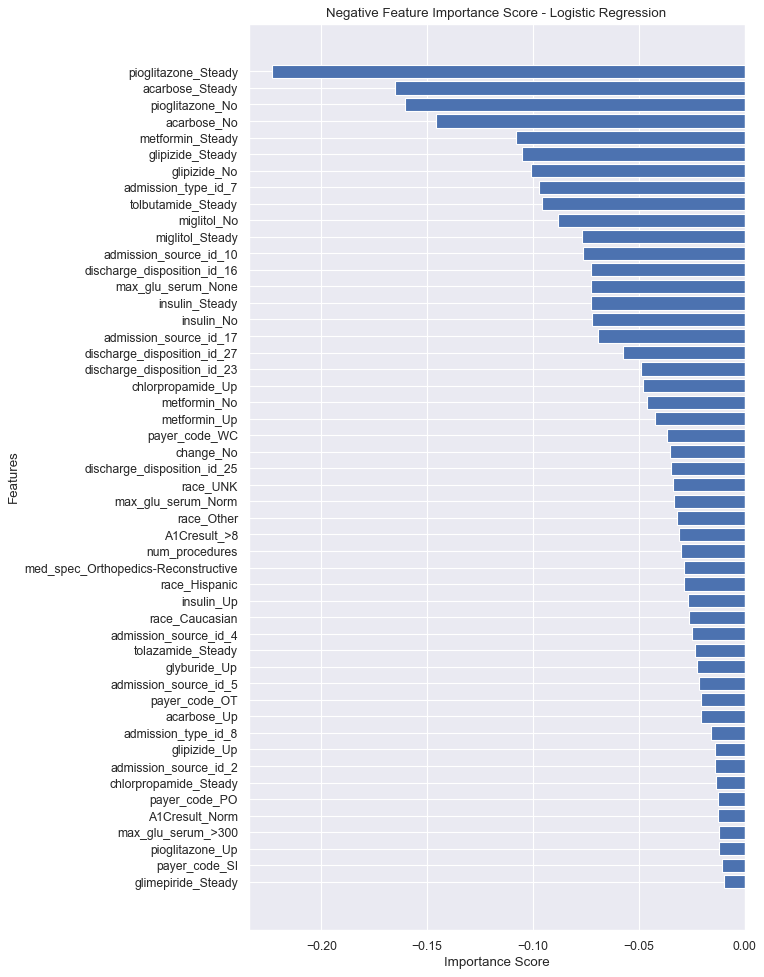

In [154]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

## Feature Importance - Random Forest 

In [155]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [156]:
feature_importances.head()

,importance
number_inpatient,0.271016
number_emergency,0.069806
discharge_disposition_id_22,0.069425
num_medications,0.065267
number_diagnoses,0.056557


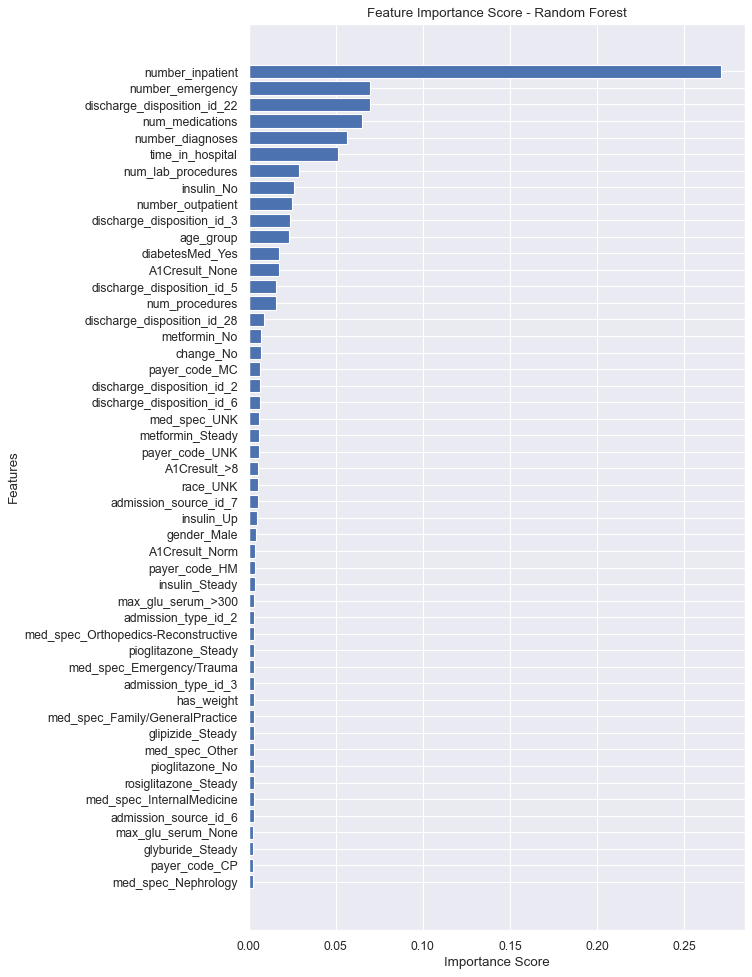

In [157]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

## Model Selection: Hyperparameter tuning

In [158]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [159]:
# Creating a grid

from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(1,10,1)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [160]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [161]:
# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [162]:
# Three important parameters of RandomizedSearchCV are

# scoring = evaluation metric used to pick the best model
# n_iter = number of different combinations
# cv = number of cross-validation splits

In [163]:
# fit the random search model 
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
101.64482760429382


In [164]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 6,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'gini'}

In [165]:
#Analyzing the performance of the best model compared to the baseline model.

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_valid_auc_base))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))

Baseline Random Forest
Training AUC:0.696
Validation AUC:0.655
Optimized Random Forest
Training AUC:0.744
Validation AUC:0.662


In [167]:
penalty = ['none','l2','l1']
max_iter = range(100,500,100)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, 
                                 n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, 
                                 random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\line

12.937705755233765


In [168]:
sgdc_random.best_params_

{'penalty': 'l2', 'max_iter': 100, 'alpha': 0.1}

In [169]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Baseline sgdc')
sgdc_train_auc_base = roc_auc_score(y_train, y_train_preds)
sgdc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_auc_base))
print('Validation AUC:%.3f'%(sgdc_valid_auc_base))
print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_auc))
print('Validation AUC:%.3f'%(sgdc_valid_auc))


Baseline sgdc
Training AUC:0.675
Validation AUC:0.661
Optimized sgdc
Training AUC:0.675
Validation AUC:0.661


In [170]:
# number of trees
n_estimators = range(100,500,100)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc,
                                n_iter = 20, cv = 2, scoring=auc_scoring,
                                verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

218.2318139076233


In [171]:
gbc_random.best_params_

{'n_estimators': 400, 'max_depth': 2, 'learning_rate': 0.1}

In [172]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Baseline gbc')
gbc_train_auc_base = roc_auc_score(y_train, y_train_preds)
gbc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_auc_base))
print('Validation AUC:%.3f'%(gbc_valid_auc_base))

print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_auc))
print('Validation AUC:%.3f'%(gbc_valid_auc))

Baseline gbc
Training AUC:0.771
Validation AUC:0.636
Optimized gbc
Training AUC:0.703
Validation AUC:0.672


## Hyperparameter tuning results

In [175]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['base','optimized']*3,
                          'auc':[sgdc_valid_auc_base,sgdc_valid_auc,
                                 rf_valid_auc_base,rf_valid_auc,
                                 gbc_valid_auc_base,gbc_valid_auc,],
                          })

In [176]:

df_results

,classifier,data_set,auc
0,SGD,base,0.661327
1,SGD,optimized,0.661327
2,RF,base,0.655253
3,RF,optimized,0.662246
4,GB,base,0.635764
5,GB,optimized,0.671749


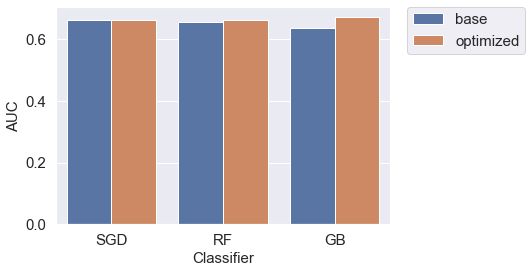

In [177]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

In [178]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)


In [179]:
# Gradient boosting classifier has the best AUC on the validation set

X_test = df_test[col2use].values
y_test = df_test['OUTPUT_LABEL'].values

scaler = pickle.load(open('scaler.sav', 'rb'))
X_test_tf = scaler.transform(X_test)

In [180]:
best_model = pickle.load(open('best_classifier.pkl','rb'))


In [181]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [182]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC : 0.703
Accuracy : 0.646
Recall : 0.597
Precision :0.661
Specificity :0.694
Prevalence :0.500
 
Validation:
AUC : 0.672
Accuracy : 0.657
Recall : 0.586
Precision :0.183
Specificity :0.666
Prevalence :0.113
 
Test:
AUC : 0.667
Accuracy : 0.649
Recall : 0.586
Precision :0.185
Specificity :0.658
Prevalence :0.117
 


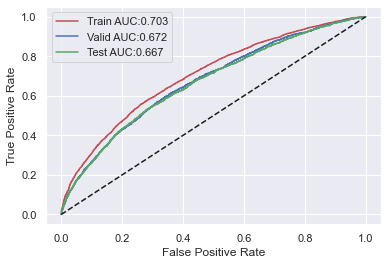

In [183]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Conclusion
#### We created a binary classifier to predict the probability that a patient with diabetes would be readmitted to the hospital within 30 days. 
#### On held out test data, our best model had an AUC of of 0.67. 
#### Using this model, we are able to catch 58% of the readmissions from our model that performs approximately 1.5 times better than randomly selecting patients.